
>This is an analysis of **loan Data** for how the different features can affect in paying back the loan.<br>
It is a publicly available data from **LendingClub.com**


>[Wikipedia] LendingClub is a fintech that provides range of financial products and services through a
technology-driven platform in the United States. It was the first peer-to-peer lender to register
its offerings as securities with the Securities and Exchange Commission, and to offer loan trading
on a secondary market.
<br>
> Data from **https://www.kaggle.com/itssuru/loan-data**

### Following topics are explored in this analysis:
- Identify/Analyse relation between FICO(Credit Score) and Annual Income and Rate of Interest
- Predict Whether the borrower will payback the loan or not
- How good is only FICO Score and credit policy(credit underwriting criteria) for approving loans

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#read loan data into a pandas dataframe
loanData = pd.read_csv("./loan_data.csv")
loanData.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
#get the data Types 
loanData.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

## Relation between Fico Score and Annual Income and ROI

- For this we have to find the correlation between these features

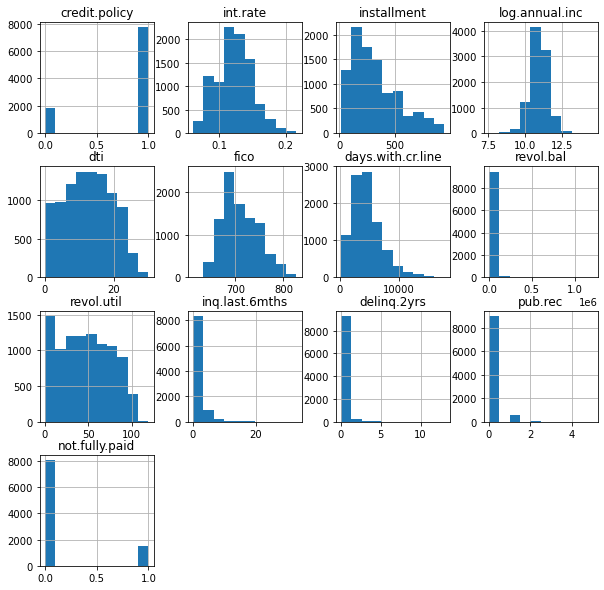

In [4]:
loanData.hist(figsize=(10, 10));
#Result will show the distribution of values for each of the columns

In [5]:
#separate feature and taget column
features = loanData.drop(columns="not.fully.paid") #colmns included -> ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util','inq.last.6mths', 'delinq.2yrs', 'pub.rec']
target = loanData["not.fully.paid"]

In [6]:
#get correlation matrix
features.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673


In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(features.corr(), annot=True, fmt=".2f", center=1);

In [ ]:
#FICO vs interest rate
plt.figure(figsize=(10, 10))
plt.scatter(features["fico"], features["int.rate"], c="red", marker="*")
plt.title("FICO vs Interest Rate")
plt.xlabel("FICO")
plt.ylabel("Interest Rate")
plt.show()

In [ ]:
#FICO vs annual income
plt.figure(figsize=(10, 10))
plt.scatter(features["fico"], features["log.annual.inc"], c="red", marker="1")
plt.title("FICO vs Annual Income")
plt.xlabel("FICO")
plt.ylabel("Annual Income")
plt.show()

In [ ]:
#annual income vs rate of interest
plt.figure(figsize=(10, 10))
plt.scatter(features["int.rate"], features["log.annual.inc"], c="red", marker="1")
plt.title("Rate of Interest vs Annual Income")
plt.xlabel("Rate of Interest")
plt.ylabel("Annual Income")
plt.show()

- **FCIO vs Interest Rate**: High negative correlation observed between FICO and Interest Rate similar obsevations from graph of FICO vs Interest Rate, Customers with high FICO score are tend to have lower interest rate. 
- **FICO vs Annual Income**: FICO score is varying for customers with similar annual income.(i.e There are other factors impacting the FICO score other than annual income)
- **Annual Income vs Rate of Interest**: Rate of Intereset is varying for customers with similar annaul income.(i.e There are other factors impacting rate of interest other than annual income)
***    
Similar analysis could be done for installment vs annual income(correlation of ~0.45 is observed) 
and for any feature combinations.     


## Predict Whether the Borrower will pay back loan or not 

In [11]:
#All the feature columns are used for this analysis

In [12]:
#data preparation and cleaning
nullFeatureValues = features.isnull().apply(sum, axis=0)
columnsWithNoValues = [col for col in nullFeatureValues if nullFeatureValues[col] > 0]
columnsWithNoValues
#empty list shows, no columns with any missing values

[]

In [13]:
categoricalValues = features.select_dtypes(include="object") #to get columsn with categorical values
#these has to be encoded before creating any prediction model

In [15]:
# these categorical values can be encoded either as numeric labels/ as OneHot encoding
# find pros and cons for both here -> https://www.kaggle.com/discussion/208643
def getEncodedValues(df, column):
    '''
    INPUT:  df: dataframe to be processed
            column: column whose values has to be encoded
            
    RETURN: new dataframe with encoded column values(orignal column is dropped)
    Info : This function creates a new dataframe consisting of values to be encoded
            get_dummies() returns dataframe of encoded values
    '''
    df_encode = df[column]
    df_rem = df.drop(columns=column)
    
    return pd.concat([df_rem, pd.get_dummies(df_encode)], axis=1)

In [16]:
print("Features Shape before encoding : ", features.shape)
for column in categoricalValues:
    features = getEncodedValues(features, column)
print("Features Shape after encoding : ", features.shape)
features.head()

Features Shape before encoding :  (9578, 13)
Features Shape after encoding :  (9578, 19)


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [17]:
# create train and test split
# target lable is not.fully.paid
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [18]:
#create pipeline to scale the data and then fit it for Logistic regression model
#scaling helps model to converge faster(less iterations required) 
modelPipeline = Pipeline([('scalar', MinMaxScaler()), ('lrModel', LogisticRegression())])
modelPipeline.fit(X_train, y_train)
predictionsOnTrainingData = modelPipeline.predict(X_train)
predictionsOnTestData = modelPipeline.predict(X_test)

In [19]:
print(classification_report(y_test, predictionsOnTestData))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.55      0.03      0.05       466

    accuracy                           0.84      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.79      0.84      0.77      2874



In [20]:
confusion_matrix(y_test, predictionsOnTestData)

array([[2398,   10],
       [ 454,   12]])

Accuracy of the trained model is 0.84 i.e model is able to classify 84% of test data correctly.

# How good if only FICO Score and Credit Score for approving loans

In [28]:
#identifying users whose credit.policy value differ from not.fully.paid value
#credit.policy != not.fully.paid
cpAndFullyPaid = sum(loanData["credit.policy"] != loanData["not.fully.paid"])/loanData.shape[0]
cpAndFullyPaid

0.7532887868030904

For >3/4th of borrowers credit policy value matches with the fully paid status.

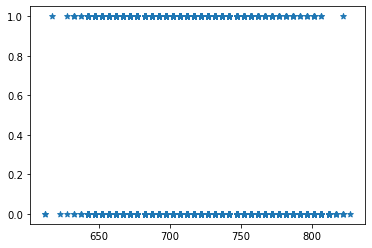

In [73]:
#FICO vs notfullypaid
plt.scatter(loanData["fico"], loanData["not.fully.paid"], marker="*")

Above plot shows that irrespective of fico value is high or low, not fully paid value doesn't show any dependecy on it. To analyse distribution of fico value for not.fully.paid = 0 or 1, KDE plot is used below  

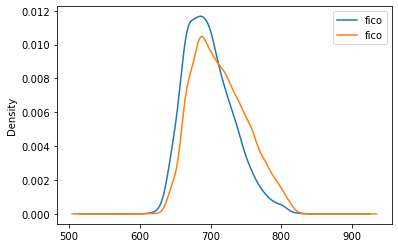

In [74]:
loanData[loanData["not.fully.paid"] == 1]["fico"].plot.kde(legend=True);
loanData[loanData["not.fully.paid"] == 0]["fico"].plot.kde(legend=True);

Since the distribution of FICO score value is similar for borrowers who have fully paid/unpaid, its value alone can't be used in approving loans